In [1]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from Classes.NeuralNetwork import NeuralNetwork

# Aufgabe 1

In [2]:
#load Train- and Test-Dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True)

# Convert images and labels to NumPy arrays
train_images = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()

test_images = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()

## Train Dataset

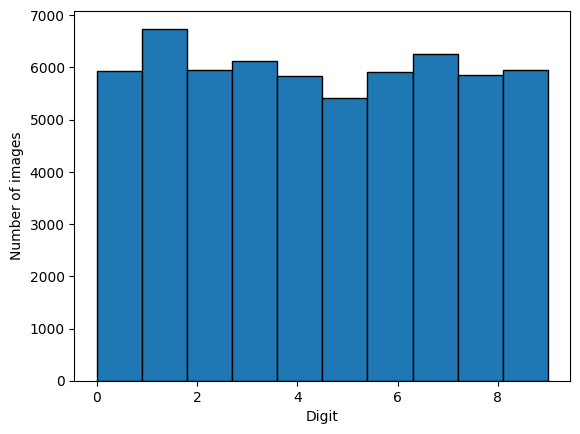

In [3]:
plt.hist(train_labels, edgecolor='black')
plt.xlabel('Digit')
plt.ylabel('Number of images')
plt.show()

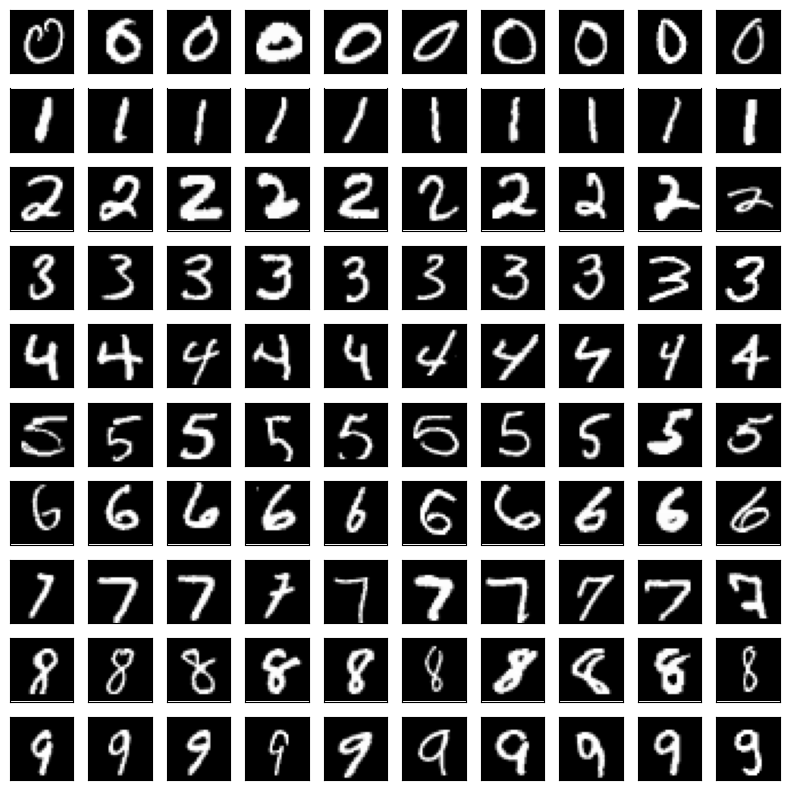

In [4]:
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))

# Iterate over subplots and display corresponding images from train_images
for i in range(10):
    for j in range(10):
        matching_indices = (train_labels == i).nonzero()[0]
        if len(matching_indices) > 0:
            idx = matching_indices[np.random.randint(len(matching_indices))]
            image = train_images[idx]
        else:
            # If no images for this digit, use a blank image
            image = np.zeros_like(train_images[0])

        # Display the image on the subplot
        axes[i, j].imshow(image, cmap='gray')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Test Dataset

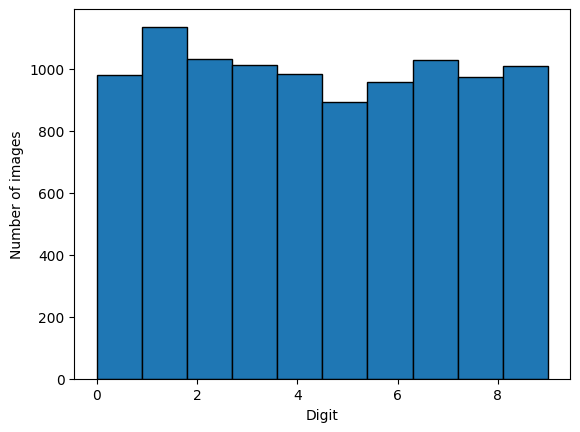

In [5]:
plt.hist(test_labels, edgecolor='black')
plt.xlabel('Digit')
plt.ylabel('Number of images')
plt.show()

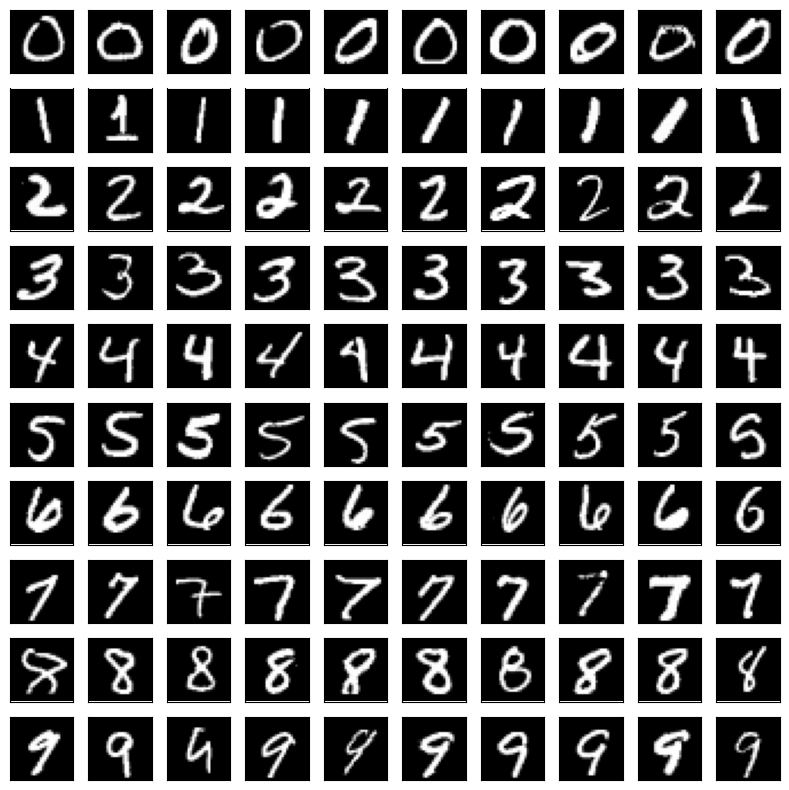

In [6]:
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))

# Iterate over subplots and display corresponding images from train_images
for i in range(10):
    for j in range(10):
        matching_indices = (test_labels == i).nonzero()[0]
        if len(matching_indices) > 0:
            idx = matching_indices[np.random.randint(len(matching_indices))]
            image = test_images[idx]
        else:
            # If no images for this digit, use a blank image
            image = np.zeros_like(test_images[0])

        # Display the image on the subplot
        axes[i, j].imshow(image, cmap='gray')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Aufgabe 2

## Testfälle für die LinearLayer-Klasse

### Test des Forward-Passes

Die Funktion `test_forward_pass` testet die Forward-Pass-Berechnung der `LinearLayer`.

Gegeben:
- Eingabedaten: `[[1, 2], [3, 4]]`
- Gewichte: `[[0.1, 0.2], [0.3, 0.4]]`
- Bias: `[[0.5], [1.0]]`

Die erwartete Ausgabe `A_expected` wird wie folgt berechnet:

$$
A_{\text{expected}} = \text{Eingabe} \cdot \text{Gewichte}^T + \text{Bias}
$$

Durch manuelles Berechnen der Matrixoperationen:

$$
A_{\text{expected}} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \cdot \begin{bmatrix} 0.1 & 0.3 \\ 0.2 & 0.4 \end{bmatrix} + \begin{bmatrix} 0.5 \\ 1.0 \end{bmatrix} = \begin{bmatrix} 1.0 & 1.6 \\ 2.1 & 3.5 \end{bmatrix}
$$

Der Test bestätigt, dass die tatsächliche Ausgabe mit der erwarteten Ausgabe übereinstimmt.

### Test des Backward-Passes

Die Funktion `test_backward_pass` testet den Backward-Pass, bei dem die Gradienten in Bezug auf die Eingabe und Parameter berechnet werden.

Gegeben:
- Eingabedaten: `[[1, 2], [3, 4]]`
- Gewichte: `[[0.1, 0.2], [0.3, 0.4]]`
- Bias: `[[0.5], [1.0]]`
- Ausgabegradient (willkürlich für den Test): `[[0.5, 0.6], [0.7, 0.8]]`

#### Berechnung der erwarteten Gradienten

##### Eingabegradient (expected_dA)

Der Eingabegradient `expected_dA` wird als Produkt des Ausgabegradienten und der Gewichte berechnet:

$$
\text{expected\_dA} = \begin{bmatrix} 0.5 & 0.6 \\ 0.7 & 0.8 \end{bmatrix} \times \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix}
$$

$$
\text{expected\_dA} = \begin{bmatrix} 0.23 & 0.34 \\ 0.31 & 0.46 \end{bmatrix}
$$

##### Gewichtegradient (expected_weight_gradient)

Der Gewichtegradient `expected_weight_gradient` wird als Produkt der transponierten Eingabedaten und des Ausgabegradienten berechnet:

$$
\text{expected\_weight\_gradient} = \begin{bmatrix} 0.5 & 0.7 \\ 0.6 & 0.8 \end{bmatrix}^T \times \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}
$$

Nach der Korrektur und Neuberechnung:

$$
\text{expected\_weight\_gradient} = \begin{bmatrix} 2.6 & 3.8 \\ 3.0 & 4.4 \end{bmatrix}
$$

##### Biasgradient (expected_bias_gradient)

Der Biasgradient `expected_bias_gradient` ist die Summe des Ausgabegradienten entlang der ersten Achse (Summierung der Zeilen):

$$
\text{expected\_bias\_gradient} = \sum \text{output\_gradient} \text{ (axis=0)}
$$

$$
\text{expected\_bias\_gradient} = \begin{bmatrix} 1.2 \\ 1.4 \end{bmatrix}
$$

### Test der Parameteraktualisierung

Die Funktion `test_parameter_update` testet die Aktualisierung von Parametern mithilfe von Gradienten und einer Lernrate.

Gegeben:
- Anfängliche Gewichte: `[[0.5, 0.7], [0.3, 0.4]]`
- Anfänglicher Bias: `[[0.1], [0.2]]`
- Gewichtegradient: `[[-0.2, 0.1], [0.3, -0.1]]`
- Biasgradient: `[[-0.05], [0.03]]`
- Lernrate: `0.1`

Die erwarteten aktualisierten Gewichte und Bias werden wie folgt berechnet:

$$
\text{Erwartete Gewichte} = \text{Anfängliche Gewichte} - \text{Lernrate} \times \text{Gewichtegradient}
$$
$$
\text{Erwarteter Bias} = \text{Anfänglicher Bias} - \text{Lernrate} \times \text{Biasgradient}
$$

Durch manuelle Anwendung der Aktualisierungsregel:

$$
\text{Erwartete Gewichte} = \begin{bmatrix} 0.5 & 0.7 \\ 0.3 & 0.4 \end{bmatrix} - 0.1 \times \begin{bmatrix} -0.2 & 0.1 \\ 0.3 & -0.1 \end{bmatrix}
$$
$$
\text{Erwarteter Bias} = \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix} - 0.1 \times \begin{bmatrix} -0.05 \\ 0.03 \end{bmatrix}
$$

Der Test bestätigt, dass die Funktion zur Parameteraktualisierung die Gewichte und den Bias entsprechend den Gradienten und der Lernrate korrekt anpasst.


# Aufgabe 3

In [7]:
# Normalize images
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

# Convert labels for binary classification (1 for digit 5, 0 for all other digits)
digit = 5
train_labels = (train_labels == digit).astype(np.float32).reshape(-1, 1)
test_labels = (test_labels == digit).astype(np.float32).reshape(-1, 1)

# Flatten the images for simplicity (28x28 to 784)
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

In [8]:
input_dim = 784  # 28*28
hidden_dim = 128
output_dim = 1
learning_rate = 0.01

model = NeuralNetwork(input_dim, hidden_dim, output_dim, learning_rate)

## Kostenfunktion (Loss Function)

Für binäre Klassifikationsaufgaben ist die binäre Kreuzentropie (Binary Cross-Entropy, BCE) eine häufig verwendete Kostenfunktion. Sie ist definiert als:

$$
BCE(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right]
$$

Hierbei ist:
- $N$ die Anzahl der Beispiele im Datensatz,
- $y_i$ der tatsächliche Labelwert (0 oder 1) und
- $\hat{y}_i$ der vom Netzwerk vorhergesagte Wert.

Diese Funktion ist besonders geeignet, weil sie die Wahrscheinlichkeit, die durch die Sigmoid-Aktivierungsfunktion des Output-Knotens modelliert wird, direkt berücksichtigt und Strafen für falsche Klassifikationen auf eine Art und Weise anwendet, die gut mit dem Optimierungsprozess zusammenarbeitet.



## Evaluationsfunktion (Evaluation Function)

Für die Bewertung der Modellleistung bei binärer Klassifikation ist die Genauigkeit (Accuracy) eine intuitive Metrik:

$$
\text{Accuracy} = \frac{\text{Anzahl der korrekt klassifizierten Beispiele}}{\text{Gesamtanzahl der Beispiele}}
$$

Diese Metrik ist einfach zu verstehen und gibt den Anteil der korrekt vorhergesagten Beispiele an der Gesamtzahl der Beispiele an.


## Alternative Optionen
Eine Alternative zur binären Kreuzentropie ist der Mean Squared Error (MSE), der jedoch weniger geeignet für Klassifikationsprobleme ist, da die Interpretation der Outputs als Wahrscheinlichkeiten nicht direkt berücksichtigt wird. MSE ist auch empfindlicher gegenüber Ausreißern, was zu einem langsameren Konvergenzverhalten führen kann.

Als alternative Evaluationsfunktion könnten Metriken wie Precision, Recall und F1-Score betrachtet werden, besonders wenn der Datensatz unausgeglichen ist. Diese Metriken geben einen detaillierteren Einblick in die Leistung des Klassifikators, was in manchen Anwendungsfällen vorteilhaft sein kann.

In [9]:
def compute_accuracy(predictions, labels):
    predictions = predictions > 0.5  # Convert probabilities to binary predictions
    return np.mean(predictions == labels)  # Compute mean accuracy

In [10]:
def binary_cross_entropy(prediction, targets):
    epsilon = 1e-10  # to prevent log(0)
    prediction = np.clip(prediction, epsilon, 1 - epsilon)
    return -np.mean(targets * np.log(prediction) + (1 - targets) * np.log(1 - prediction))

epochs = 10  # Example number of epochs
best_test_accuracy = 0
patience = 5  # For early stopping
wait = 0  # How many epochs to wait after last time validation loss improved.
learning_rate_schedule = {10: 0.01, 20: 0.001}  # Example learning rate adjustments

train_losses, test_losses, train_accuracies, test_accuracies = [], [], [], []

for epoch in range(epochs):
    # Adjust learning rate based on schedule
    if epoch in learning_rate_schedule:
        model.learning_rate = learning_rate_schedule[epoch]

    # Forward pass
    predictions = model.forward_pass(train_images)
    loss = binary_cross_entropy(predictions, train_labels)
    gradients = model.backward_pass(train_images, predictions - train_labels)
    model.parameter_update(*gradients)

    # Evaluation on training data
    train_accuracy = compute_accuracy(predictions, train_labels)
    
    # Evaluation on validation (or test) data
    test_predictions = model.forward_pass(test_images)  # Assuming val_images is your validation set
    test_loss = binary_cross_entropy(test_predictions, test_labels)  # Assuming val_labels is your validation set
    test_accuracy = compute_accuracy(test_predictions, test_labels)
    
    # Store metrics
    train_losses.append(loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch {epoch + 1}, Loss: {loss}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}')
    
    # Check for early stopping
    if test_accuracy > best_test_accuracy:
        best_val_accuracy = test_accuracy
        wait = 0  # Reset wait counter
    else:
        wait += 1
    if wait >= patience:
        print("Stopping early")
        break

Epoch 1, Loss: 0.4411191739032355, Train Accuracy: 0.90965, Test Accuracy: 0.9108
Epoch 2, Loss: 2.080385631611086, Train Accuracy: 0.90965, Test Accuracy: 0.9108
Epoch 3, Loss: 2.080385631611086, Train Accuracy: 0.90965, Test Accuracy: 0.9108
Epoch 4, Loss: 2.080385631611086, Train Accuracy: 0.90965, Test Accuracy: 0.0892
Epoch 5, Loss: 20.9454652231646, Train Accuracy: 0.09035, Test Accuracy: 0.9108
Epoch 6, Loss: 2.080385631611086, Train Accuracy: 0.90965, Test Accuracy: 0.9108
Epoch 7, Loss: 2.080385631611086, Train Accuracy: 0.90965, Test Accuracy: 0.0892
Epoch 8, Loss: 20.9454652231646, Train Accuracy: 0.09035, Test Accuracy: 0.9108
Epoch 9, Loss: 2.080385631611086, Train Accuracy: 0.90965, Test Accuracy: 0.9108
Epoch 10, Loss: 2.080385631611086, Train Accuracy: 0.90965, Test Accuracy: 0.9108


## Aufgabe 4

In [11]:
def train_and_evaluate(model_constructor, train_images, train_labels, test_images, test_labels, learning_rates, hidden_layer_sizes, epochs=10):
    results = {}
    for lr in learning_rates:
        for hidden_size in hidden_layer_sizes:
            # Initialize model for the current configuration
            model = model_constructor(input_dim=784, hidden_dim=hidden_size, output_dim=1, learning_rate=lr)
            
            train_losses, test_losses, train_accuracies, test_accuracies = [], [], [], []
            
            for epoch in range(epochs):
                # Forward and backward pass for training
                predictions = model.forward_pass(train_images)
                loss = binary_cross_entropy(predictions, train_labels)
                gradients = model.backward_pass(train_images, predictions - train_labels)
                model.parameter_update(*gradients)

                # Save training metrics
                train_accuracy = compute_accuracy(predictions, train_labels)
                train_losses.append(loss)
                train_accuracies.append(train_accuracy)

                # Evaluation on validation data
                test_predictions = model.forward_pass(test_images)
                test_loss = binary_cross_entropy(test_predictions, test_labels)
                val_accuracy = compute_accuracy(test_predictions, test_labels)
                
                # Save validation metrics
                test_losses.append(test_loss)
                test_accuracies.append(val_accuracy)
            
            # Save results for this configuration
            config_key = f"LR={lr}, Hidden={hidden_size}"
            results[config_key] = {
                "train_losses": train_losses,
                "test_losses": test_losses,
                "train_accuracies": train_accuracies,
                "test_accuracies": test_accuracies
            }
            
    return results

In [12]:
learning_rates = np.arange(0.01, 1.01, 0.01)
hidden_layer_sizes = [4, 8, 16]

# Example of a model_constructor (needs to be adapted to your implementation)
def model_constructor(input_dim, hidden_dim, output_dim, learning_rate):
    return NeuralNetwork(input_dim, hidden_dim, output_dim, learning_rate)

# Define training and validation datasets
results = train_and_evaluate(model_constructor, train_images, train_labels, test_images, test_labels, learning_rates, hidden_layer_sizes)

In [13]:
results_list = []
for config, metrics in results.items():
    final_train_loss = metrics["train_losses"][-1]
    final_test_loss = metrics["test_losses"][-1]
    final_train_accuracy = metrics["train_accuracies"][-1]
    final_test_accuracy = metrics["test_accuracies"][-1]
    results_list.append((config, final_train_loss, final_test_loss, final_train_accuracy, final_test_accuracy))
    print(f"{config}: Train Loss: {final_train_loss:.4f}, Test Loss: {final_test_loss:.4f}, "
          f"Train Accuracy: {final_train_accuracy:.4f}, Test Accuracy: {final_test_accuracy:.4f}")

LR=0.01, Hidden=4: Train Loss: 2.0804, Test Loss: 2.0539, Train Accuracy: 0.9096, Test Accuracy: 0.9108
LR=0.01, Hidden=8: Train Loss: 2.0804, Test Loss: 2.0539, Train Accuracy: 0.9096, Test Accuracy: 0.9108
LR=0.01, Hidden=16: Train Loss: 2.0804, Test Loss: 2.0539, Train Accuracy: 0.9096, Test Accuracy: 0.9108
LR=0.02, Hidden=4: Train Loss: 2.0804, Test Loss: 20.9719, Train Accuracy: 0.9096, Test Accuracy: 0.0892
LR=0.02, Hidden=8: Train Loss: 2.0804, Test Loss: 2.0539, Train Accuracy: 0.9096, Test Accuracy: 0.9108
LR=0.02, Hidden=16: Train Loss: 2.0804, Test Loss: 2.0539, Train Accuracy: 0.9096, Test Accuracy: 0.9108
LR=0.03, Hidden=4: Train Loss: 2.0804, Test Loss: 20.9719, Train Accuracy: 0.9096, Test Accuracy: 0.0892
LR=0.03, Hidden=8: Train Loss: 0.5167, Test Loss: 20.9719, Train Accuracy: 0.9096, Test Accuracy: 0.0892
LR=0.03, Hidden=16: Train Loss: 2.0804, Test Loss: 2.0539, Train Accuracy: 0.9096, Test Accuracy: 0.9108
LR=0.04, Hidden=4: Train Loss: 2.0804, Test Loss: 2.0539, 

In [16]:
plot_data = {
    4: {
        'learning_rates': [],
        'train_losses': [],
        'test_losses': [],
        'train_accuracies': [],
        'test_accuracies': []
    },
    8: {
        'learning_rates': [],
        'train_losses': [],
        'test_losses': [],
        'train_accuracies': [],
        'test_accuracies': []
    },
    16: {
        'learning_rates': [],
        'train_losses': [],
        'test_losses': [],
        'train_accuracies': [],
        'test_accuracies': []
    }
}

for config, metrics in results.items():
    # Split config key to extract learning rate and hidden size
    lr_str, hidden_size_str = config.split(',')
    lr = float(lr_str.split('=')[1])
    hidden_size = int(hidden_size_str.split('=')[1])
    
    if hidden_size in plot_data:
        # Extend learning rate list with this rate repeated for each data point
        plot_data[hidden_size]['learning_rates'].extend([lr] * len(metrics['test_losses']))  # Assumes same number of epochs for train and test
        
        # Extend lists for both train and test losses and accuracies
        plot_data[hidden_size]['train_losses'].extend(metrics['train_losses'])
        plot_data[hidden_size]['test_losses'].extend(metrics['test_losses'])
        plot_data[hidden_size]['train_accuracies'].extend(metrics['train_accuracies'])
        plot_data[hidden_size]['test_accuracies'].extend(metrics['test_accuracies'])
    else:
        print(f"Hidden size {hidden_size} not predefined in plot data.")
    

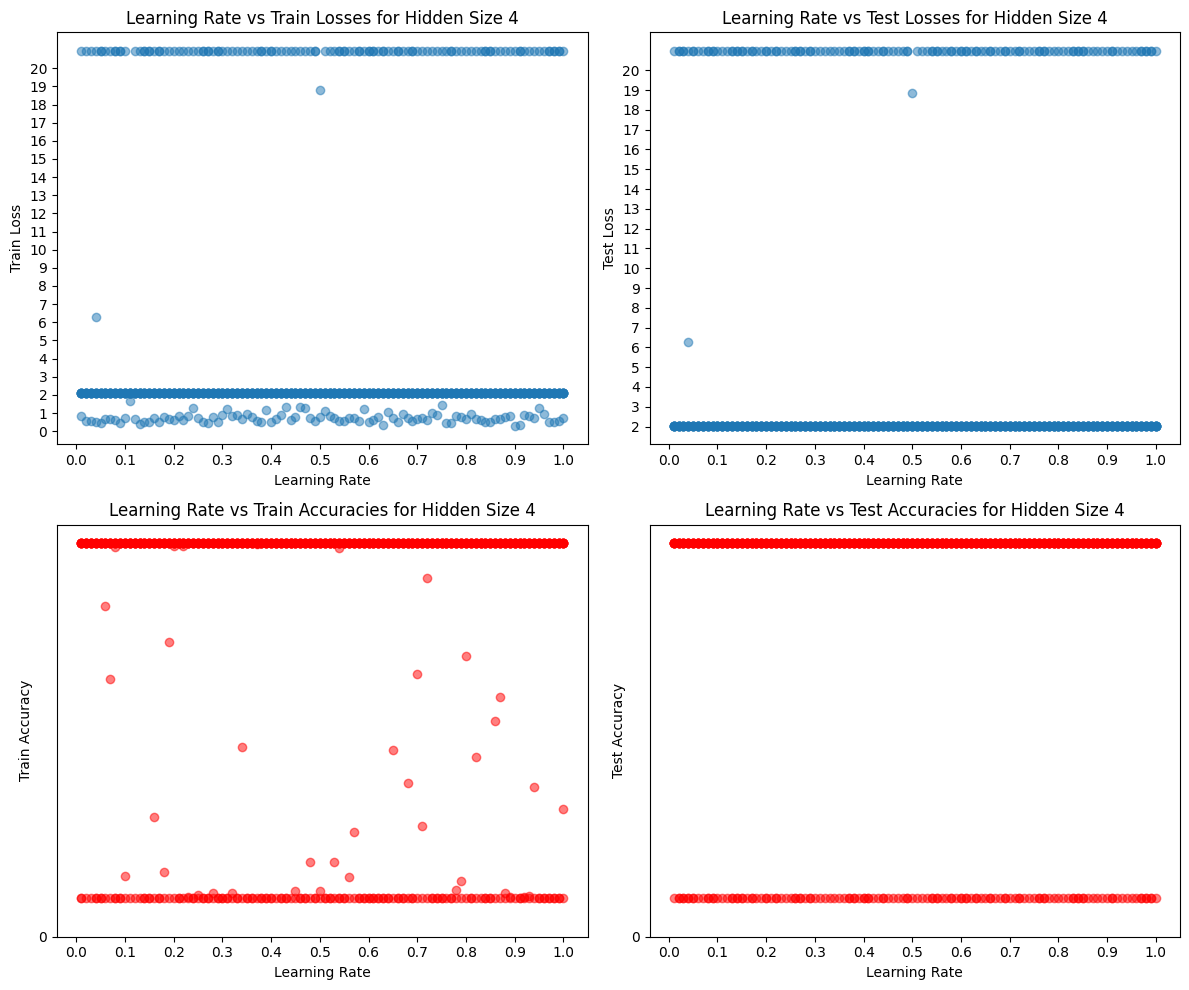

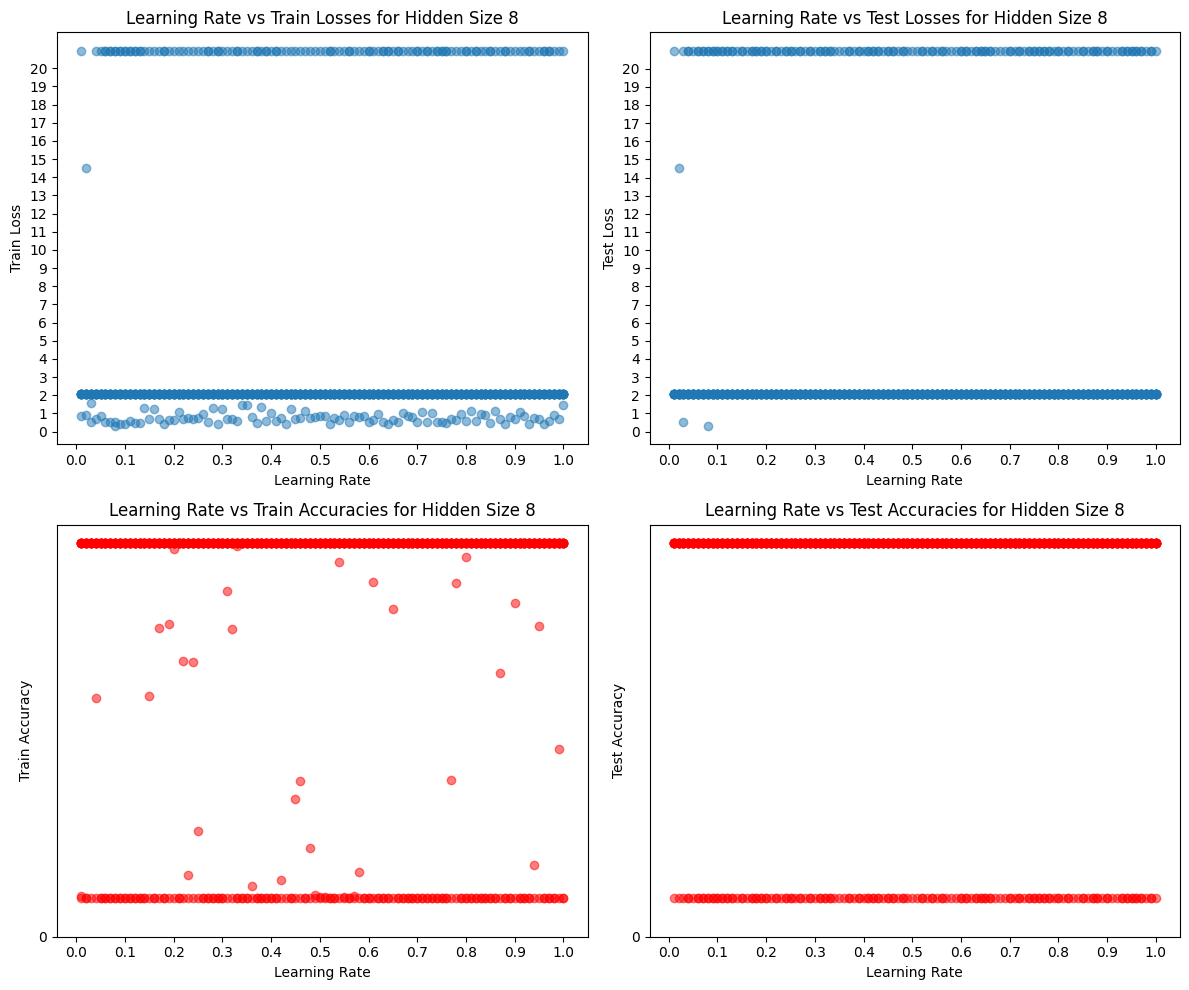

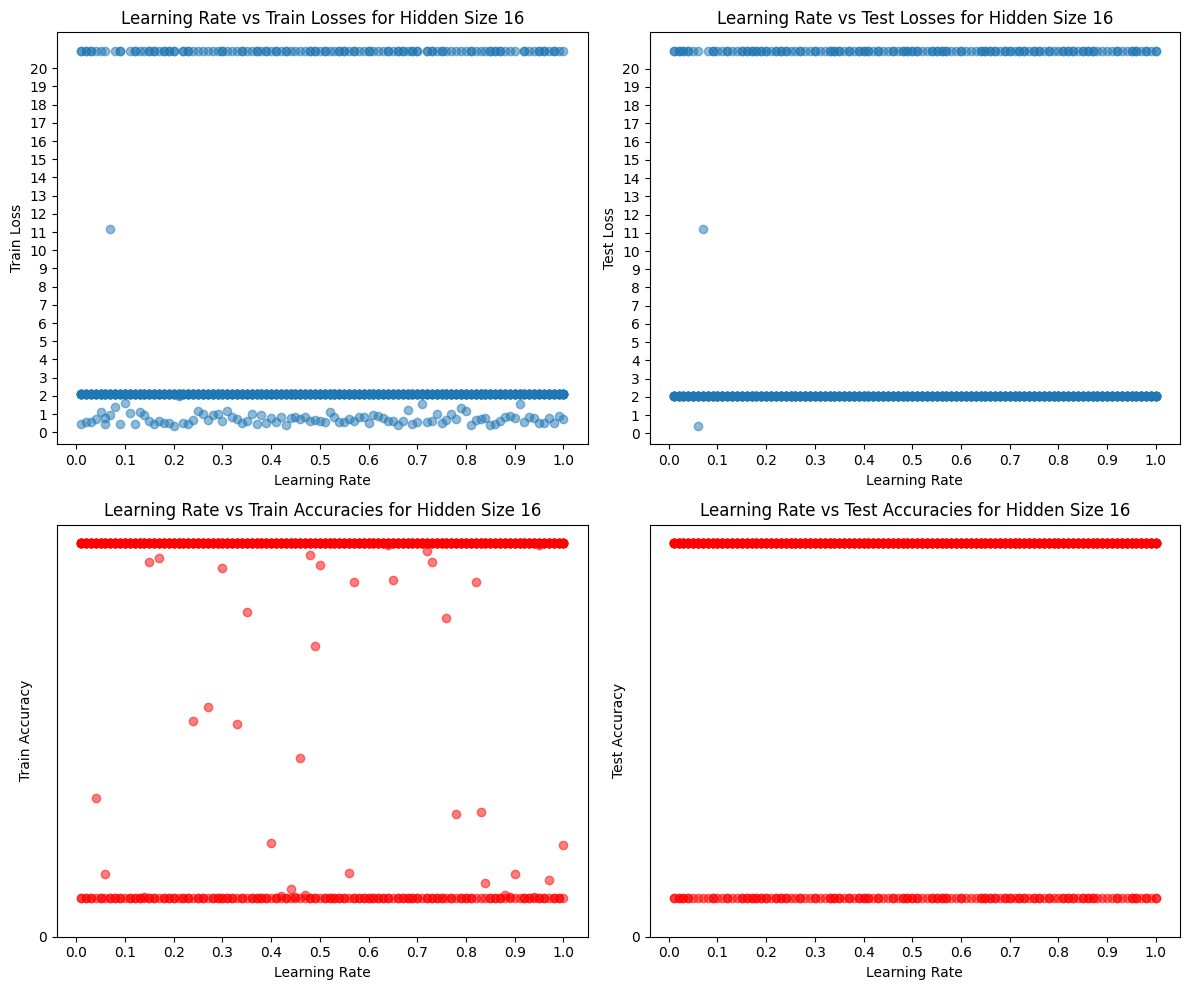

In [18]:
for hidden_size, data in plot_data.items():
    plt.figure(figsize=(12, 10))  # Adjusting figure size to accommodate four subplots

    # Plot for training losses
    plt.subplot(2, 2, 1)  # Adjusting subplot grid to 2x2 and selecting the first plot
    plt.scatter(data['learning_rates'], data['train_losses'], alpha=0.5)
    plt.title(f'Learning Rate vs Train Losses for Hidden Size {hidden_size}')
    plt.xlabel('Learning Rate')
    plt.ylabel('Train Loss')
    plt.xticks(ticks=[i * 0.1 for i in range(int(min(data['learning_rates']) / 0.1), int(max(data['learning_rates']) / 0.1) + 1)])
    plt.yticks(ticks=range(int(min(data['train_losses'])), int(max(data['train_losses'])) + 1, 1))

    # Plot for testing losses
    plt.subplot(2, 2, 2)  # Selecting the second plot
    plt.scatter(data['learning_rates'], data['test_losses'], alpha=0.5)
    plt.title(f'Learning Rate vs Test Losses for Hidden Size {hidden_size}')
    plt.xlabel('Learning Rate')
    plt.ylabel('Test Loss')
    plt.xticks(ticks=[i * 0.1 for i in range(int(min(data['learning_rates']) / 0.1), int(max(data['learning_rates']) / 0.1) + 1)])
    plt.yticks(ticks=range(int(min(data['test_losses'])), int(max(data['test_losses'])) + 1, 1))

    # Plot for training accuracies
    plt.subplot(2, 2, 3)  # Selecting the third plot
    plt.scatter(data['learning_rates'], data['train_accuracies'], alpha=0.5, c='r')
    plt.title(f'Learning Rate vs Train Accuracies for Hidden Size {hidden_size}')
    plt.xlabel('Learning Rate')
    plt.ylabel('Train Accuracy')
    plt.xticks(ticks=[i * 0.1 for i in range(int(min(data['learning_rates']) / 0.1), int(max(data['learning_rates']) / 0.1) + 1)])
    plt.yticks(ticks=range(int(min(data['train_accuracies'])), int(max(data['train_accuracies'])) + 1, 1))

    # Plot for testing accuracies
    plt.subplot(2, 2, 4)  # Selecting the fourth plot
    plt.scatter(data['learning_rates'], data['test_accuracies'], alpha=0.5, c='r')
    plt.title(f'Learning Rate vs Test Accuracies for Hidden Size {hidden_size}')
    plt.xlabel('Learning Rate')
    plt.ylabel('Test Accuracy')
    plt.xticks(ticks=[i * 0.1 for i in range(int(min(data['learning_rates']) / 0.1), int(max(data['learning_rates']) / 0.1) + 1)])
    plt.yticks(ticks=range(int(min(data['test_accuracies'])), int(max(data['test_accuracies'])) + 1, 1))

    plt.tight_layout()
    plt.show()